In [2]:
!ls

2017.xlsx	      category.xlsx  filter.spec       requirements.txt
2018.xlsx	      dist	     generate_exe.bat  Untitled1.ipynb
build		      filter.exe     __pycache__       Untitled.ipynb
calculate_result.xls  filter.py      README.md	       venv


In [1]:
import pandas as pd

In [16]:
a = pd.read_excel('2017.xlsx', header=1)
a


,行业类别码（6位）,市,行业类别码（6位）.1,行业类别名称,销售量,销售额,销售人数
0,102001,宁阳市,102001,1,0.449786,0.146214,0.394188
1,105001,宁阳市,105001,1,0.699231,0.045276,0.249831
2,105002,宁阳市,105002,1,0.234777,0.088112,0.358618
3,105003,宁阳市,105003,1,0.379078,0.661476,0.379647
4,105004,宁阳市,105004,1,0.770002,0.571813,0.079918
...,...,...,...,...,...,...,...
101,122002,宁阳市,122002,1,0.825608,0.109165,0.548367
102,122003,宁阳市,122003,1,0.626359,0.587604,0.984303
103,123001,宁阳市,123001,1,0.269365,0.912415,0.499560
104,124001,宁阳市,124001,1,0.518683,0.337578,0.256419


In [76]:
c = pd.read_excel('category.xlsx', header=1)


In [49]:
import os, re
def get_data_path():
    re_data_path = re.compile(r'^[1-9]{1}[0-9]{3}.xlsx$')   

    data_path = []
    for path in os.listdir():
        if re_data_path.match(path):
            data_path.append(path)
    return data_path

print(get_data_path())
data_path = get_data_path()
re.match('\d{4}', data_path[0]).group()

['2017.xlsx', '2018.xlsx']


'2017'

In [78]:
a = pd.DataFrame()
for path in data_path:
    year = re.match('\d{4}', path).group()
    for i in range(index, 13):
        b = pd.read_excel(path, header=1, sheet_name=f'{i}月')
        b.insert(0, 'date',f'{year}-{i}')
        ab = pd.concat([a, b])
        a = ab
ab


,date,行业类别码（6位）,市,行业类别码（6位）.1,行业类别名称,销售量,销售额,销售人数
0,2017-1,102001,宁阳市,102001,1,0.449786,0.146214,0.394188
1,2017-1,105001,宁阳市,105001,1,0.699231,0.045276,0.249831
2,2017-1,105002,宁阳市,105002,1,0.234777,0.088112,0.358618
3,2017-1,105003,宁阳市,105003,1,0.379078,0.661476,0.379647
4,2017-1,105004,宁阳市,105004,1,0.770002,0.571813,0.079918
...,...,...,...,...,...,...,...,...
101,2018-12,122002,宁阳市,122002,1,0.848281,0.225349,0.398355
102,2018-12,122003,宁阳市,122003,1,0.398840,0.227084,0.270161
103,2018-12,123001,宁阳市,123001,1,0.015473,0.576814,0.105993
104,2018-12,124001,宁阳市,124001,1,0.563273,0.170805,0.276852


In [79]:
na_value = 0.5
ab = ab.fillna(value=na_value)

In [80]:
ab.rename(columns={'行业类别码（6位）':'number', '销售量':'sale_count', '销售额':'sale_number', '销售人数': 'sale_people'}, inplace = True)

In [81]:
ab

,date,number,市,行业类别码（6位）.1,行业类别名称,sale_count,sale_number,sale_people
0,2017-1,102001,宁阳市,102001,1,0.449786,0.146214,0.394188
1,2017-1,105001,宁阳市,105001,1,0.699231,0.045276,0.249831
2,2017-1,105002,宁阳市,105002,1,0.234777,0.088112,0.358618
3,2017-1,105003,宁阳市,105003,1,0.379078,0.661476,0.379647
4,2017-1,105004,宁阳市,105004,1,0.770002,0.571813,0.079918
...,...,...,...,...,...,...,...,...
101,2018-12,122002,宁阳市,122002,1,0.848281,0.225349,0.398355
102,2018-12,122003,宁阳市,122003,1,0.398840,0.227084,0.270161
103,2018-12,123001,宁阳市,123001,1,0.015473,0.576814,0.105993
104,2018-12,124001,宁阳市,124001,1,0.563273,0.170805,0.276852


In [82]:
n = ab[ab['number']==c['行业类别码（6位）'][80]]
n

,date,number,市,行业类别码（6位）.1,行业类别名称,sale_count,sale_number,sale_people
47,2017-1,112009,宁阳市,112009,1,0.698550,0.205706,0.999008
47,2017-2,112009,宁阳市,112009,1,0.924254,0.976274,0.278477
47,2017-3,112009,宁阳市,112009,1,0.553019,0.693219,0.216757
47,2017-4,112009,宁阳市,112009,1,0.280364,0.841440,0.724034
47,2017-5,112009,宁阳市,112009,1,0.962292,0.258091,0.296043
47,2017-6,112009,宁阳市,112009,1,0.882648,0.032930,0.088790
47,2017-7,112009,宁阳市,112009,1,0.540644,0.265366,0.415343
47,2017-8,112009,宁阳市,112009,1,0.101506,0.688535,0.234339
47,2017-9,112009,宁阳市,112009,1,0.114633,0.080811,0.958131
47,2017-10,112009,宁阳市,112009,1,0.588047,0.384633,0.438328


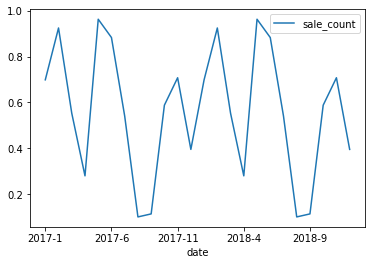

In [87]:
n.plot(x='date', y='sale_count', kind='line')

In [89]:
n.to_excel('foo.xlsx', sheet_name='Sheet1')

In [61]:
import pandas as pd
import numpy as np
from numpy import nan as NaN

In [62]:
df1=pd.DataFrame([[1,2,3],[NaN,NaN,2],[NaN,NaN,NaN],[8,8,NaN]])
df1

,0,1,2
0,1.0,2.0,3.0
1,NaN,NaN,2.0
2,NaN,NaN,NaN
3,8.0,8.0,NaN


In [63]:
df1.fillna(100)


,0,1,2
0,1.0,2.0,3.0
1,100.0,100.0,2.0
2,100.0,100.0,100.0
3,8.0,8.0,100.0


In [64]:
df1

,0,1,2
0,1.0,2.0,3.0
1,NaN,NaN,2.0
2,NaN,NaN,NaN
3,8.0,8.0,NaN
